In [1]:
# Standard Libraries

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# For visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls


# For Web Scrapping
import requests
from bs4 import BeautifulSoup

# For Data Pre-processing
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer   
from textblob import Word, TextBlob
from wordcloud import WordCloud , STOPWORDS
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# For topic modeling
from sklearn.decomposition import NMF, LatentDirichletAllocation

# For sentiment analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Boghdady\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Boghdady\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Boghdady\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Extracting reviews from "Skytrax" website

In [2]:
website = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 50              # Total no. of pages selected for review extraction
page_size = 100          

reviews = []            # object to store extracted reviews from website

for i in range(1, pages + 1):      

    print(f"Scraping data from Page {i}")

    # Create URL to collect links 
    url = f"{website}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    
    response = requests.get(url)     # Collect HTML data from this page

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} Total Reviews")

Scraping data from Page 1
   ---> 100 Total Reviews
Scraping data from Page 2
   ---> 200 Total Reviews
Scraping data from Page 3
   ---> 300 Total Reviews
Scraping data from Page 4
   ---> 400 Total Reviews
Scraping data from Page 5
   ---> 500 Total Reviews
Scraping data from Page 6
   ---> 600 Total Reviews
Scraping data from Page 7
   ---> 700 Total Reviews
Scraping data from Page 8
   ---> 800 Total Reviews
Scraping data from Page 9
   ---> 900 Total Reviews
Scraping data from Page 10
   ---> 1000 Total Reviews
Scraping data from Page 11
   ---> 1100 Total Reviews
Scraping data from Page 12
   ---> 1200 Total Reviews
Scraping data from Page 13
   ---> 1300 Total Reviews
Scraping data from Page 14
   ---> 1400 Total Reviews
Scraping data from Page 15
   ---> 1500 Total Reviews
Scraping data from Page 16
   ---> 1600 Total Reviews
Scraping data from Page 17
   ---> 1700 Total Reviews
Scraping data from Page 18
   ---> 1800 Total Reviews
Scraping data from Page 19
   ---> 1900 Total 

*  We have collected the data required for this task.
*  The loops above collected 3753 reviews by iterating through the pages on the website.

- Storing reviews in a pandas dataframe 

In [3]:
df = pd.DataFrame()               
df["reviews"] = reviews             
df.head()

,reviews
0,✅ Trip Verified | Have no fear when your BA f...
1,Not Verified | We have flown BA five times fr...
2,✅ Trip Verified | London Heathrow to Istanbul...
3,"Not Verified | Jan 30th, I booked a last-minut..."
4,✅ Trip Verified | I am a British Airways Gold ...


*  Next step is to clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed wherever it exists as it's not relevant or any special characters etc.

## 1. Text Preprocessing

### 1.1 Removing the symbol " | "

In [4]:
df['reviews'] = df['reviews'].str.replace('|', '')


In [5]:
df.head()

,reviews
0,✅ Trip Verified Have no fear when your BA fl...
1,Not Verified We have flown BA five times fro...
2,✅ Trip Verified London Heathrow to Istanbul ...
3,"Not Verified Jan 30th, I booked a last-minute..."
4,✅ Trip Verified I am a British Airways Gold G...


### 1.2. Cleaning the text

In [6]:
def clean(text):
    # Removes all special characters and numericals, leaving only the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the 'reviews' column and creating a new column 'Cleaned Reviews'
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df['reviews'] = df['reviews'].str.replace('[^\w\s]', '')
df.head()

,reviews,Cleaned Reviews
0,✅ Trip Verified Have no fear when your BA fl...,Trip Verified Have no fear when your BA fligh...
1,Not Verified We have flown BA five times fro...,Not Verified We have flown BA five times from ...
2,✅ Trip Verified London Heathrow to Istanbul ...,Trip Verified London Heathrow to Istanbul at ...
3,"Not Verified Jan 30th, I booked a last-minute...",Not Verified Jan th I booked a last minute tra...
4,✅ Trip Verified I am a British Airways Gold G...,Trip Verified I am a British Airways Gold Gue...


### 1.3.Converting into Lower Case

In [7]:
df['reviews'] = df['reviews'].str.lower()
df.head()

,reviews,Cleaned Reviews
0,✅ trip verified have no fear when your ba fl...,Trip Verified Have no fear when your BA fligh...
1,not verified we have flown ba five times fro...,Not Verified We have flown BA five times from ...
2,✅ trip verified london heathrow to istanbul ...,Trip Verified London Heathrow to Istanbul at ...
3,"not verified jan 30th, i booked a last-minute...",Not Verified Jan th I booked a last minute tra...
4,✅ trip verified i am a british airways gold g...,Trip Verified I am a British Airways Gold Gue...


### 1.4.Removing Numbers

In [8]:
df['reviews'] = df['reviews'].str.replace('\d', '')
df.head()

,reviews,Cleaned Reviews
0,✅ trip verified have no fear when your ba fl...,Trip Verified Have no fear when your BA fligh...
1,not verified we have flown ba five times fro...,Not Verified We have flown BA five times from ...
2,✅ trip verified london heathrow to istanbul ...,Trip Verified London Heathrow to Istanbul at ...
3,"not verified jan 30th, i booked a last-minute...",Not Verified Jan th I booked a last minute tra...
4,✅ trip verified i am a british airways gold g...,Trip Verified I am a British Airways Gold Gue...


### 1.5.Word Tokenization

- Tokenization is the process of breaking the text into smaller pieces called Tokens. It can be performed at sentences(sentence tokenization) or word level(word tokenization).

In [9]:
df["reviews"].apply(lambda x: TextBlob(x).words).head()

0    [✅, trip, verified, have, no, fear, when, your...
1    [not, verified, we, have, flown, ba, five, tim...
2    [✅, trip, verified, london, heathrow, to, ista...
3    [not, verified, jan, 30th, i, booked, a, last-...
4    [✅, trip, verified, i, am, a, british, airways...
Name: reviews, dtype: object

### 1.6.Removing Stopwords

In [10]:
sw = stopwords.words('english')
df['reviews'] = df['reviews'].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))
df.head()

,reviews,Cleaned Reviews
0,✅ trip verified fear ba flight operated finnai...,Trip Verified Have no fear when your BA fligh...
1,verified flown ba five times western usa engla...,Not Verified We have flown BA five times from ...
2,✅ trip verified london heathrow istanbul start...,Trip Verified London Heathrow to Istanbul at ...
3,"verified jan 30th, booked last-minute, transat...",Not Verified Jan th I booked a last minute tra...
4,✅ trip verified british airways gold guest lis...,Trip Verified I am a British Airways Gold Gue...


### 1.7.Removing the unnecessary column

In [11]:
df = df.drop('reviews', axis=1)
df.head()

,Cleaned Reviews
0,Trip Verified Have no fear when your BA fligh...
1,Not Verified We have flown BA five times from ...
2,Trip Verified London Heathrow to Istanbul at ...
3,Not Verified Jan th I booked a last minute tra...
4,Trip Verified I am a British Airways Gold Gue...


In [12]:
df.rename(columns={'Cleaned Reviews': 'reviews'}, inplace=True)

### 1.8.Lemmatization

In [13]:
df['reviews'] = df['reviews'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df['reviews'].head(10)

0    Trip Verified Have no fear when your BA flight...
1    Not Verified We have flown BA five time from w...
2    Trip Verified London Heathrow to Istanbul at t...
3    Not Verified Jan th I booked a last minute tra...
4    Trip Verified I am a British Airways Gold Gues...
5    Not Verified Another case of reviewing British...
6    Trip Verified On the memorable day of January ...
7    Not Verified I did not actually get to fly wit...
8    Trip Verified We had possibly the worse check ...
9    Trip Verified I flew to LHR from ATH in Club E...
Name: reviews, dtype: object

In [14]:
df.head()

,reviews
0,Trip Verified Have no fear when your BA flight...
1,Not Verified We have flown BA five time from w...
2,Trip Verified London Heathrow to Istanbul at t...
3,Not Verified Jan th I booked a last minute tra...
4,Trip Verified I am a British Airways Gold Gues...


## 2.Topic Modeling

### 2.1.Vectorizing Raw Text

- At this juncture, our raw text though human readable is still unfortunately not yet machine readable. A machine can read in bits and numbers and therefore we will first need to convert our text into numbers for which we utilise a very common approach known as the Bag-of-Words
- The Bag of Words approach - This approach uses the counts of words as a starting block and records the occurrence of each word (from the entire text) in a vector specific to that particular word.

In [15]:
cv = CountVectorizer()
x = cv.fit_transform(reviews) 
x

<3753x14164 sparse matrix of type '<class 'numpy.int64'>'
	with 379143 stored elements in Compressed Sparse Row format>

## 2.2.Implementing topic modelling techniques-Latent Dirichlet Allocation

Latent Dirichlet Allocation
Probabilistic, generative model which uncovers the topics latent to a dataset by assigning weights to words in a corpus, where each topic will assign different probability weights to each word.

In [16]:
# Define helper function to print top words
def print_top_words(model, feature_names, n_top_words):
    for index, topic in enumerate(model.components_):
        message = "\nTopic #{}:".format(index)
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1 :-1]])
        print(message)
        print("="*70)

In [17]:
lda = LatentDirichletAllocation(n_components=11, max_iter=5,
                                learning_method = 'online',
                                learning_offset = 50.,
                                random_state = 0)

lda.fit(x)

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, n_components=11, random_state=0)

In [18]:
### Topics generated by LDA
n_top_words = 40
print("\nTopics in LDA model: ")
feature_names = cv.get_feature_names_out()  
print_top_words(lda, feature_names, n_top_words)


Topics in LDA model: 

Topic #0:stakes unmanaged overfull the to and was not for cheapskate with flight we on in is ba that of get no have business our british at had they us airways it verified but class this service as were even their

Topic #1:the 1st and men of mode is amuse to soup bouche was fas flowers plastic couscous regional in pepper mct caviar ba tonics seafood stare lh smelly seats lamb avianca humor pizza ec 10a champagne class wtp not tacky mia

Topic #2:kwi b763 ifs lustre underground aud gf uniforms 463 bzhb euoe ba458 870 rabid bovine downfall shoved joyus bartenders ba157 ba156 ba1459 ba1454 boozy dissapointment citzien borrowed smarten economics shaved reruns stubble humourless subsidise sitcoms designer tumble nations soaps sorting

Topic #3:sodium petite flavorful naan blackberries diced jamun gulab muslim herb roasted halal blueberries to the and was of broccoli in flight not my with that me for on get economy it were at british trip verified time masala cabin a

## 2.3.Generating the wordcloud for the first 4 topics

In [19]:
first_topic = lda.components_[0]
second_topic = lda.components_[1]
third_topic = lda.components_[2]
fourth_topic = lda.components_[3]

first_topic_words = [feature_names[i] for i in first_topic.argsort()[:-50 - 1 :-1]]
second_topic_words = [feature_names[i] for i in second_topic.argsort()[:-50 - 1 :-1]]
third_topic_words = [feature_names[i] for i in third_topic.argsort()[:-50 - 1 :-1]]
fourth_topic_words = [feature_names[i] for i in fourth_topic.argsort()[:-50 - 1 :-1]]

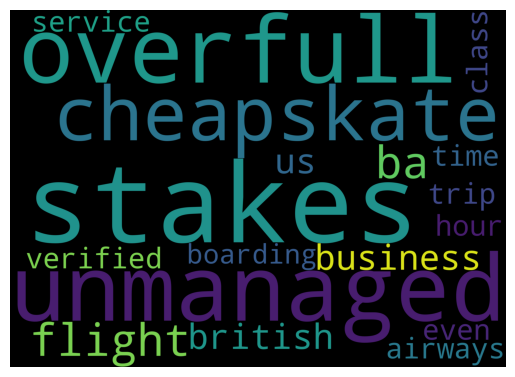

In [20]:
# Generating the wordcloud with the values for first topic
firstcloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          width=2500,
                          height=1800
                         ).generate(" ".join(first_topic_words))
plt.imshow(firstcloud)
plt.axis('off')
plt.show()

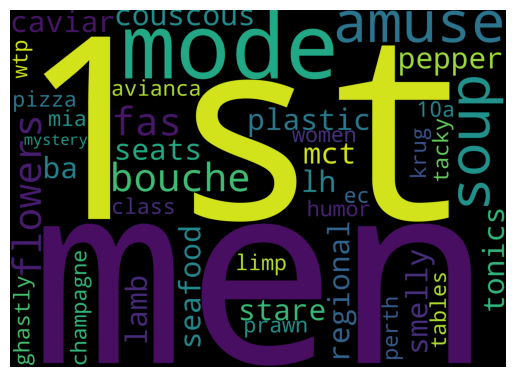

In [21]:
#Generating the wordcloud with the values for Second topic
secondcloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          width=2500,
                          height=1800
                         ).generate(" ".join(second_topic_words))
plt.imshow(secondcloud)
plt.axis('off')
plt.show()

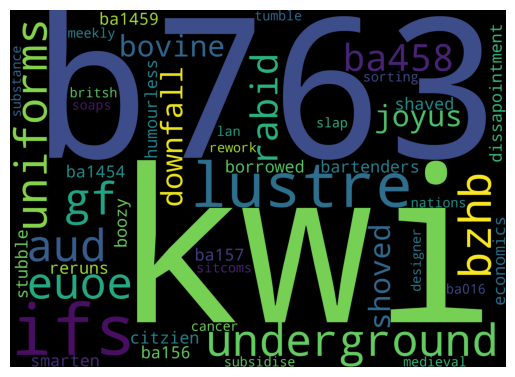

In [22]:
# Generating the wordcloud with the values for third topic
thirdcloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          width=2500,
                          height=1800
                         ).generate(" ".join(third_topic_words))
plt.imshow(thirdcloud)
plt.axis('off')
plt.show()

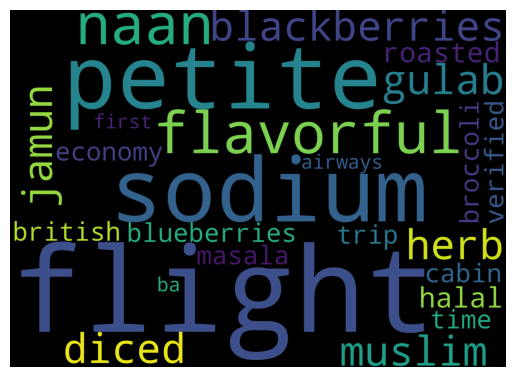

In [23]:
# Generating the wordcloud with the values for fouth topic
fourthcloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          width=2500,
                          height=1800
                         ).generate(" ".join(fourth_topic_words))
plt.imshow(fourthcloud)
plt.axis('off')
plt.show()

## 3.Sentiment Analysis
* For Sentiment Analysis, we’ll use VADER Sentiment Analysis, where VADER means Valence Aware Dictionary and sentiment Reasoner.
* VADER not only tells about the Polarity score , in addition, it tells us how positive or negative a statement is.

In [24]:
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['reviews'].apply(vadersentimentanalysis)


def vader_analysis(compound):                
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Sentiment,Analysis
0,Trip Verified Have no fear when your BA flight...,0.5142,Positive
1,Not Verified We have flown BA five time from w...,-0.9001,Negative
2,Trip Verified London Heathrow to Istanbul at t...,0.2640,Neutral
3,Not Verified Jan th I booked a last minute tra...,-0.7454,Negative
4,Trip Verified I am a British Airways Gold Gues...,0.9308,Positive


In [25]:
analysis = df['Analysis'].value_counts()
analysis

Analysis
Positive    1936
Negative    1487
Neutral      330
Name: count, dtype: int64

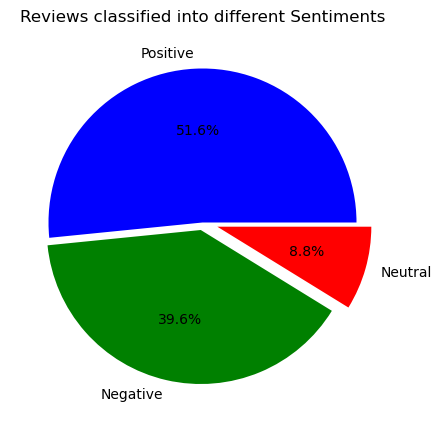

In [26]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,2)
plt.title("Reviews classified into different Sentiments")
plt.pie(analysis.values, labels = analysis.index, explode = (0, 0.05, 0.1), autopct='%1.1f%%', shadow=False , colors=("blue", "green", "red"))
plt.show()

## 4.Text Visualization
### 4.1.Top 20 words with highest frequency in our dataset

In [27]:
all_words = df['reviews'].str.split(expand=True).unstack().value_counts()
data = [go.Bar(
            x = all_words.index.values[2:20],
            y = all_words.values[2:20],
            marker= dict(colorscale='Jet',
                         color = all_words.values[2:50]
                        ),
            text='Word counts'
    )]

layout = go.Layout(
    title='Top 20 Word frequencies in the dataset'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')